# Imports

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sciStat
import pandas as pd
from IPython.display import clear_output
import sys
import rich
import pickle
import time


import xobjects as xo
import xtrack as xt
import xpart as xp

sys.path.append('../')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as dtune
import BBStudies.Physics.Base as phys
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Constants as cst

LINEFOLDER   = '../Data/Lines/'
SURVEYFOLDER = '../Data/Surveys/'
df_columns = ['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy']


line   = {}
twiss  = {}
survey = {}

# Importing twiss
for seq in ['lhcb1','lhcb4']:
    _beam = seq[-2:]
    
    # Importing Line
    line[_beam] = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')
    
    # Importing twiss and tracker
    if _beam == 'b1':
        tracker       = xt.Tracker(line=line[_beam])
        twiss[_beam]  = tracker.twiss().to_pandas(index="name")
        survey[_beam] = tracker.survey().to_pandas(index="name")
    elif _beam == 'b4':
        _tracker      = xt.Tracker(line=line[_beam])
        twiss['b2']   = _tracker.twiss().reverse().to_pandas(index="name")
        survey['b2']  = _tracker.survey().reverse().to_pandas(index="name")


# Filtering twiss
#====================================
twiss['b1'] = xPlus.filter_twiss(twiss['b1'],entries=['drift','..'])
twiss['b2'] = xPlus.filter_twiss(twiss['b2'],entries=['drift','..','bbcw'])
#====================================

# Clearing xsuite ouput
clear_output(wait=False)

# Creating IP objects!

In [2]:
B1 = inp.Beam('b1',twiss['b1'],survey['b1'],
              Nb       = 1.1e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss['b2'],survey['b2'],
              Nb       = 1.1e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)

---
# Head-on Footprint
--- 

In [5]:
import pickle

coordinates = pd.read_pickle('pickle_footprint/coordinates.pkl')

with open(f'pickle_footprint/tracked_ref.pkl','rb') as f:
        tracked_ref = pickle.load(f)

with open(f'pickle_footprint/tracked_HO.pkl','rb') as f:
        tracked_HO = pickle.load(f)

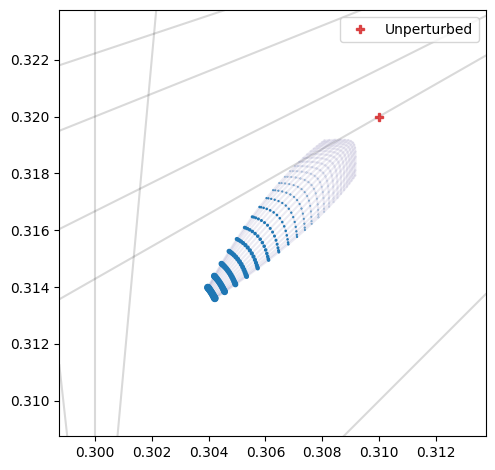

In [8]:
window    = 0.015
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting



# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
for idx,tracked in enumerate([tracked_HO]):
    dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
    dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
#---------------

bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx_tot,Qy_tot,s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()

---
# Single LR
---

In [36]:
np.sqrt((6.333605e-05/1.361833e+02)**(-1))/3

488.78197827586905

In [31]:
display(IP1.bb.loc['bb_lr.r1b1_01'])
display(IP1.bb.loc['bb_lr.r1b1_24'])

s              3.740023e+00
r              1.032806e+00
dx            -1.535430e-07
dy            -1.196942e-03
dx_n          -1.233800e-03
dy_n          -9.312567e+00
A_w_s          1.014083e+00
B_w_s          1.030357e+00
betx           4.925554e+01
bety           4.767014e+01
k1            -3.251764e-05
k3             1.361833e+02
(b1, x_lab)    4.145934e-08
(b1, y_lab)    5.984745e-04
(b2, x_lab)   -1.120837e-07
(b2, y_lab)   -5.984679e-04
Name: bb_lr.r1b1_01, dtype: float64

s              8.976055e+01
r              1.191835e+00
dx            -4.013554e-02
dy            -8.846907e-03
dx_n          -3.952976e+01
dy_n          -7.310892e+00
A_w_s          1.015803e+00
B_w_s          1.024415e+00
betx           4.380877e+03
bety           3.136620e+03
k1             2.502459e-08
k3             6.333605e-05
(b1, x_lab)    2.006748e-02
(b1, y_lab)    3.876230e-03
(b2, x_lab)   -2.006806e-02
(b2, y_lab)   -4.970676e-03
Name: bb_lr.r1b1_24, dtype: float64

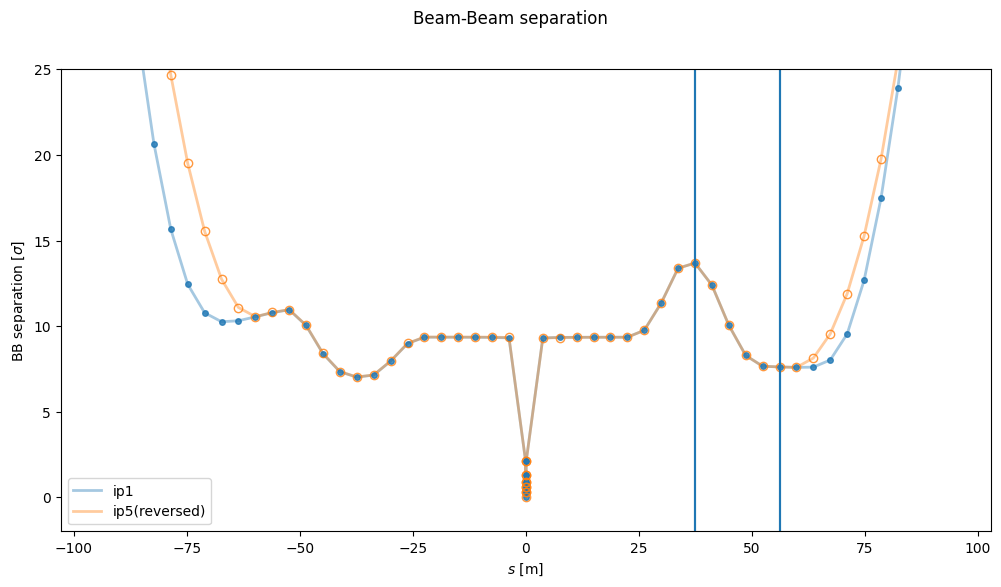

In [11]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f'Beam-Beam separation')

for _IP in [IP1,IP5]:
    
    # Plotting   
   
    dx_n_tot = np.sqrt(_IP.bb['dx_n']**2 + _IP.bb['dy_n']**2)
    if _IP.name == 'ip1':
        plt.plot(_IP.bb['s'],dx_n_tot,'-',color='C0',alpha=0.4,lw=2,label=_IP.name,zorder=-10)
        plt.plot(_IP.bb['s'],dx_n_tot,ls='' ,color='C0',alpha=0.8,marker='.',ms=8)
    else:
        plt.plot(-_IP.bb['s'],dx_n_tot,'-',color='C1',alpha=0.4,lw=2,label=_IP.name + '(reversed)',zorder=-9)
        plt.plot(-_IP.bb['s'],dx_n_tot,ls='' ,color='C1',alpha=0.8,marker='.',mfc='none',ms=12)
    plt.legend()

    plt.axvline(IP1.bb.loc['bb_lr.r1b1_10','s'])
    plt.axvline(IP1.bb.loc['bb_lr.r1b1_15','s'])
    
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    
    plt.ylim([-2,25])

In [28]:
dQx

particle
0      0.000020
1      0.000020
2      0.000020
3      0.000020
4      0.000020
         ...   
340    0.000019
341    0.000019
342    0.000019
343    0.000019
344    0.000019
Name: Qx, Length: 345, dtype: float64

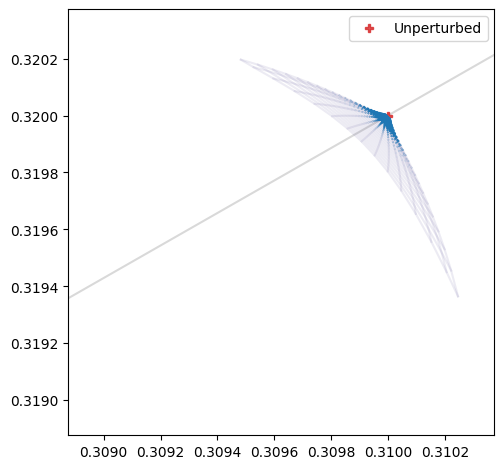

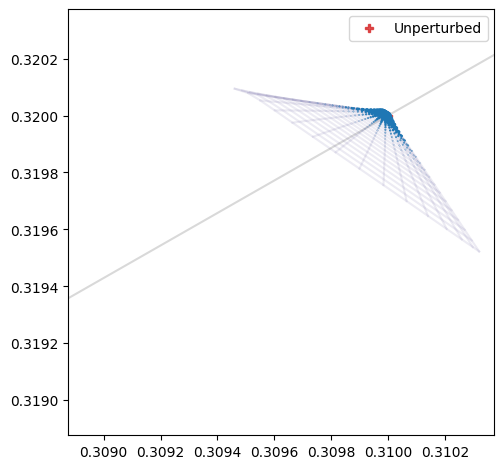

In [30]:
window    = 0.0015
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting

import pickle
coordinates = pd.read_pickle('pickle_footprint/coordinates.pkl')
with open(f'pickle_footprint/tracked_ref.pkl','rb') as f:
        tracked_ref = pickle.load(f)
for i in ['01',24]:

    with open(f'pickle_footprint/single_lr_{i}.pkl','rb') as f:
            tracked = pickle.load(f)


    # ALL PARTICLES
    chosen_particles = (coordinates['r_sig']>0)

    Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
    Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
    #---------------
    for idx,tracked in enumerate([tracked]):
        dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
        dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
        if i == '01':
            Qx_tot += dQx*1
            Qy_tot += dQy*1
        else:
            Qx_tot += (dQx - dQx[0])*500
            Qy_tot += (dQy- dQy[0])*500
    #---------------

    bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
    plt.scatter(Qx_tot,Qy_tot,s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

    plt.legend(loc='upper right')
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.tight_layout()

---
# Analytic comparison
---

In [11]:
import time

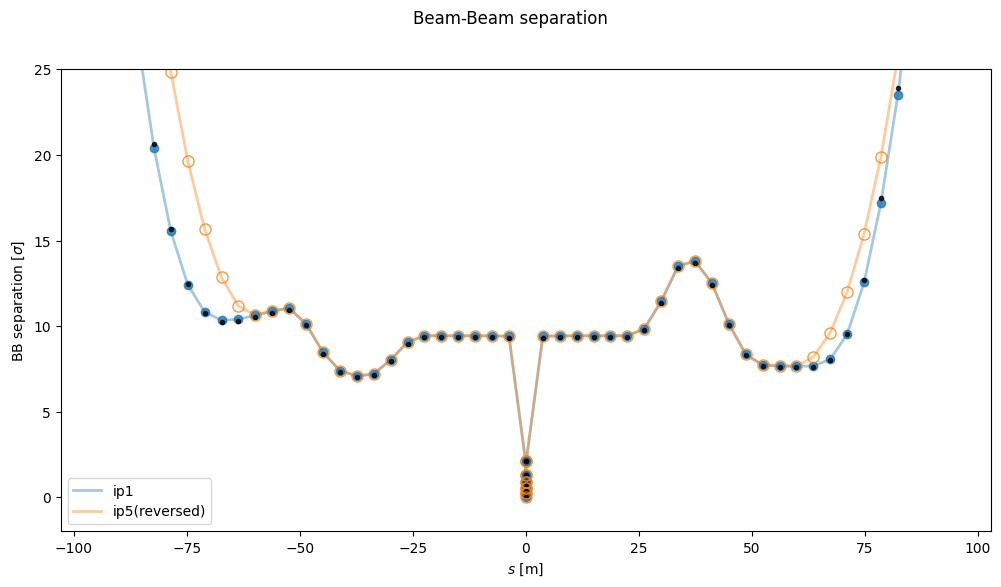

In [33]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f'Beam-Beam separation')

for IP in [IP1,IP5]:
    
    # Plotting   
    shift_x = np.array([tracker.element_refs[_bb].other_beam_shift_x._value for _bb in IP.bb.index])
    shift_y = np.array([tracker.element_refs[_bb].other_beam_shift_y._value for _bb in IP.bb.index])


    
    sig_x = np.array([tracker.element_refs[_bb].other_beam_Sigma_11._value for _bb in IP.bb.index])
    sig_y = np.array([tracker.element_refs[_bb].other_beam_Sigma_33._value for _bb in IP.bb.index])

    sig_x_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_11._value[0] for _bb in IP.ho.index])
    sig_y_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_33._value[0] for _bb in IP.ho.index])

    sig_x[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_x_HO
    sig_y[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_y_HO

    sig_x = np.sqrt(sig_x.astype(float))
    sig_y = np.sqrt(sig_y.astype(float))
    
    dx = shift_x-twiss['b1'].loc[IP.bb.index].x.values
    dy = shift_y-twiss['b1'].loc[IP.bb.index].y.values

    #HO ONLY
    ref_shift_x = np.array([tracker.element_refs[_bb].ref_shift_x._value for _bb in IP.ho.index])
    ref_shift_y = np.array([tracker.element_refs[_bb].ref_shift_y._value for _bb in IP.ho.index])

    slices_other_beam_x_center = np.array([tracker.element_refs[_bb].slices_other_beam_x_center._value[0] for _bb in IP.ho.index])
    slices_other_beam_y_center = np.array([tracker.element_refs[_bb].slices_other_beam_y_center._value[0] for _bb in IP.ho.index])

    dx[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] += ref_shift_x + slices_other_beam_x_center
    dy[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] += ref_shift_y + slices_other_beam_y_center


    dx_sig_tot = np.sqrt((dx/sig_x)**2 + (dy/sig_y)**2)
    dx_sig_computed = np.sqrt(IP.bb['dx_n']**2 + IP.bb['dy_n']**2)

    s_vec   = twiss['b1'].loc[IP.bb.index].s.values - twiss['b1'].loc[IP.name].s

    if IP.name == 'ip1':
        plt.plot(s_vec,dx_sig_tot,'-',color='C0',alpha=0.4,lw=2,label=IP.name,zorder=-10)
        plt.plot(s_vec,dx_sig_tot,ls='' ,color='C0',alpha=0.8,marker='.',ms=12)

        plt.plot(IP.bb['s'],dx_sig_computed,ls='' ,color='k',alpha=0.8,marker='.',ms=6)
        
    else:
        plt.plot(-s_vec,dx_sig_tot,'-',color='C1',alpha=0.4,lw=2,label=IP.name + '(reversed)',zorder=-9)
        plt.plot(-s_vec,dx_sig_tot,ls='' ,color='C1',alpha=0.8,marker='.',mfc='none',ms=16)
        #plt.plot(-_IP.bb['s'],dx_sig_computed,ls='' ,color='k',alpha=0.8,marker='.',ms=6)
    plt.legend()
    
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    
    plt.ylim([-2,25])

Execution time, HO: 2.598 s
Execution time, HO: 2.095 s
Execution time, HO: 1.996 s
Execution time, HO: 1.974 s
Execution time, HO: 1.982 s
Execution time, HO: 1.858 s
Execution time, HO: 1.985 s
Execution time, HO: 1.985 s
Execution time, HO: 1.914 s
Execution time, HO: 2.370 s
Execution time, HO: 2.819 s
Execution time, HO: 2.922 s
Execution time, HO: 2.323 s
Execution time, HO: 2.367 s
Execution time, HO: 1.819 s
Execution time, HO: 2.106 s
Execution time, HO: 2.157 s
Execution time, HO: 2.104 s
Execution time, HO: 1.827 s
Execution time, HO: 2.391 s
Execution time, HO: 2.481 s
Execution time, HO: 2.960 s


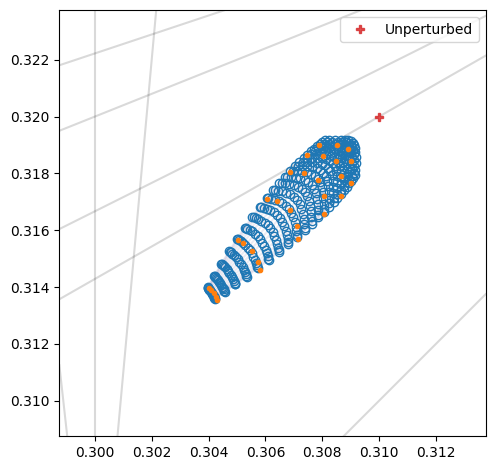

In [14]:

window    = 0.015
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting

coordinates2 = phys.polar_grid(  r_sig     = np.linspace(1,6,6),
                                    theta_sig = np.linspace(0.05*np.pi/2,0.95*np.pi/2,5),
                                    emitt     = [B1.emittx,B1.emitty])
coordinates2.insert(0,'delta',0)


# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
for idx,tracked in enumerate([tracked_HO]):
    dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
    dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
#---------------

bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',color='C0',mfc='none')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

#=============================
# Analytic
DQx_HO,DQy_HO = np.zeros(len(coordinates2))+Qx_0,np.zeros(len(coordinates2))+Qy_0


for IP in [IP1,IP5]:
    for index, _bb in IP.ho.iterrows():
        s_time = time.time()

    
        # _DQx,_DQy = dtune.HeadOn_round( ax    = coordinates['x_sig'],
        #                                 ay    = coordinates['y_sig'],
        #                                 r     = _bb['r'],
        #                                 emitt = IP.b2.emittx,
        #                                 xi    = IP.b2.xi/len(IP1.ho))

        _DQx,_DQy = dtune.DQx_DQy(  ax     = coordinates2['x_sig'],
                                    ay     = coordinates2['y_sig'],
                                    r      = _bb['r'],
                                    dx_sig = _bb['dx_n'],
                                    dy_sig = _bb['dy_n'],
                                    A_w_s  = _bb['A_w_s'],
                                    B_w_s  = _bb['B_w_s'],
                                    xi     = IP.b2.xi/len(IP1.ho))

        DQx_HO += _DQx
        DQy_HO += _DQy

        e_time = time.time()
        print(f'Execution time, HO: {(e_time-s_time):.3f} s')
#=============================

plt.plot(DQx_HO,DQy_HO,'.',color='C1')
plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()




Execution time, HO: 8.005 s
Execution time, HO: 6.638 s
Execution time, HO: 5.936 s
Execution time, HO: 6.105 s
Execution time, HO: 5.843 s
Execution time, HO: 5.651 s
Execution time, HO: 5.848 s
Execution time, HO: 6.018 s
Execution time, HO: 5.878 s
Execution time, HO: 6.996 s
Execution time, HO: 8.664 s
Execution time, HO: 8.931 s
Execution time, HO: 7.376 s
Execution time, HO: 6.818 s
Execution time, HO: 5.387 s
Execution time, HO: 6.372 s
Execution time, HO: 6.564 s
Execution time, HO: 6.355 s
Execution time, HO: 5.435 s
Execution time, HO: 7.035 s
Execution time, HO: 7.526 s
Execution time, HO: 9.159 s


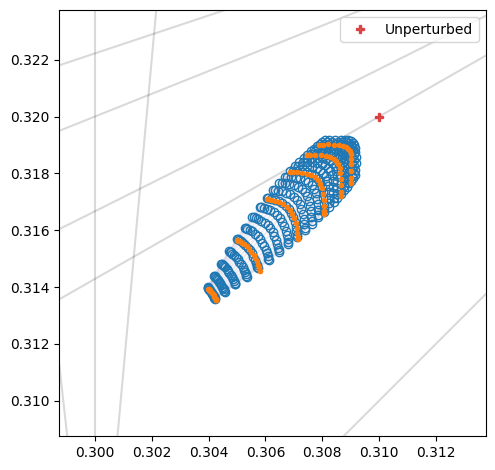

In [44]:
window    = 0.015
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting

coordinates2 = phys.polar_grid(  r_sig     = np.linspace(1,6,6),
                                    theta_sig = np.linspace(0.05*np.pi/2,0.95*np.pi/2,15),
                                    emitt     = [B1.emittx,B1.emitty])
coordinates2.insert(0,'delta',0)


# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
for idx,tracked in enumerate([tracked_HO]):
    dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
    dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
#---------------

bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',color='C0',mfc='none')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

#=============================
# Analytic
DQx_HO,DQy_HO = np.zeros(len(coordinates2))+Qx_0,np.zeros(len(coordinates2))+Qy_0

for IP in [IP1,IP5]:

    # Plotting   
    shift_x = np.array([tracker.element_refs[_bb].other_beam_shift_x._value for _bb in IP.bb.index])
    shift_y = np.array([tracker.element_refs[_bb].other_beam_shift_y._value for _bb in IP.bb.index])


    
    sig_x = np.array([tracker.element_refs[_bb].other_beam_Sigma_11._value for _bb in IP.bb.index])
    sig_y = np.array([tracker.element_refs[_bb].other_beam_Sigma_33._value for _bb in IP.bb.index])

    sig_x_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_11._value[0] for _bb in IP.ho.index])
    sig_y_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_33._value[0] for _bb in IP.ho.index])

    sig_x[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_x_HO
    sig_y[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_y_HO

    sig_x = np.sqrt(sig_x.astype(float))
    sig_y = np.sqrt(sig_y.astype(float))
    
    dx = shift_x-twiss['b1'].loc[IP.bb.index].x.values
    dy = shift_y-twiss['b1'].loc[IP.bb.index].y.values

    #HO ONLY
    ref_shift_x = np.array([tracker.element_refs[_bb].ref_shift_x._value for _bb in IP.ho.index])
    ref_shift_y = np.array([tracker.element_refs[_bb].ref_shift_y._value for _bb in IP.ho.index])

    slices_other_beam_x_center = np.array([tracker.element_refs[_bb].slices_other_beam_x_center._value[0] for _bb in IP.ho.index])
    slices_other_beam_y_center = np.array([tracker.element_refs[_bb].slices_other_beam_y_center._value[0] for _bb in IP.ho.index])

    dx[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] += ref_shift_x + slices_other_beam_x_center
    dy[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] += ref_shift_y + slices_other_beam_y_center


    #dx_sig_tot = np.sqrt((dx/sig_x)**2 + (dy/sig_y)**2)
    #dx_sig_computed = np.sqrt(IP.bb['dx_n']**2 + IP.bb['dy_n']**2)

    dx_n = dx/sig_x
    dy_n = dy/sig_y

    dx_n = dx_n[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)]
    dy_n = dy_n[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)]
    
    idx_num=0
    for index, _bb in IP.ho.iterrows():
        
        s_time = time.time()
    
        # _DQx,_DQy = dtune.HeadOn_round( ax    = coordinates['x_sig'],
        #                                 ay    = coordinates['y_sig'],
        #                                 r     = _bb['r'],
        #                                 emitt = IP.b2.emittx,
        #                                 xi    = IP.b2.xi/len(IP1.ho))

        _DQx,_DQy = dtune.DQx_DQy(  ax     = coordinates2['x_sig'],
                                    ay     = coordinates2['y_sig'],
                                    r      = _bb['r'],
                                    dx_sig   = dx_n[idx_num],#_bb['dx_n'],
                                    dy_sig   = dy_n[idx_num],#_bb['dy_n'],
                                    A_w_s  = _bb['A_w_s'],
                                    B_w_s  = _bb['B_w_s'],
                                    xi     = IP.b2.xi/len(IP1.ho))

        DQx_HO += _DQx
        DQy_HO += _DQy
        idx_num += 1

        e_time = time.time()
        print(f'Execution time, HO: {(e_time-s_time):.3f} s')
#=============================

plt.plot(DQx_HO,DQy_HO,'.',color='C1')
plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()




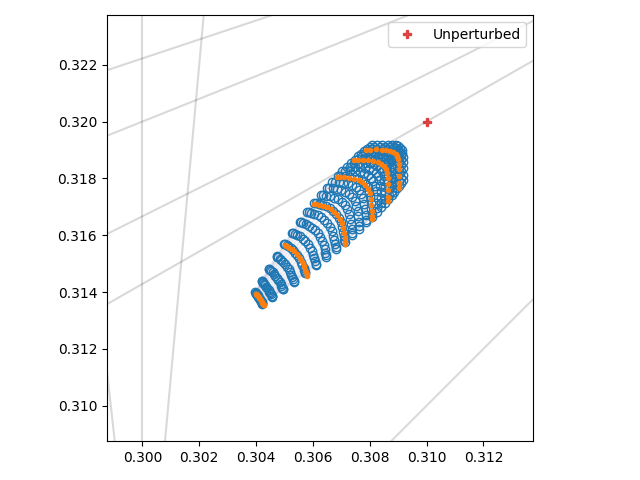

In [45]:
%matplotlib widget
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',color='C0',mfc='none')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')


plt.plot(DQx_HO,DQy_HO,'.',color='C1')
plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()


In [14]:
for IP in [IP1,IP5]:

    # Plotting   
    shift_x = np.array([tracker.element_refs[_bb].other_beam_shift_x._value for _bb in IP.bb.index])
    shift_y = np.array([tracker.element_refs[_bb].other_beam_shift_y._value for _bb in IP.bb.index])


    
    sig_x = np.array([tracker.element_refs[_bb].other_beam_Sigma_11._value for _bb in IP.bb.index])
    sig_y = np.array([tracker.element_refs[_bb].other_beam_Sigma_33._value for _bb in IP.bb.index])

    sig_x_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_11._value[0] for _bb in IP.ho.index])
    sig_y_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_33._value[0] for _bb in IP.ho.index])

    sig_x[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_x_HO
    sig_y[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_y_HO

    sig_x = np.sqrt(sig_x.astype(float))
    sig_y = np.sqrt(sig_y.astype(float))
    
    dx = shift_x-twiss['b1'].loc[IP.bb.index].x.values
    dy = shift_y-twiss['b1'].loc[IP.bb.index].y.values

    #HO ONLY
    ref_shift_x = np.array([tracker.element_refs[_bb].ref_shift_x._value for _bb in IP.ho.index])
    ref_shift_y = np.array([tracker.element_refs[_bb].ref_shift_y._value for _bb in IP.ho.index])

    slices_other_beam_x_center = np.array([tracker.element_refs[_bb].slices_other_beam_x_center._value[0] for _bb in IP.ho.index])
    slices_other_beam_y_center = np.array([tracker.element_refs[_bb].slices_other_beam_y_center._value[0] for _bb in IP.ho.index])

    dx[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] += ref_shift_x + slices_other_beam_x_center
    dy[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] += ref_shift_y + slices_other_beam_y_center


    dx_sig_tot = np.sqrt((dx/sig_x)**2 + (dy/sig_y)**2)
    dx_sig_computed = np.sqrt(IP.bb['dx_n']**2 + IP.bb['dy_n']**2)

    s_vec   = twiss['b1'].loc[IP.bb.index].s.values - twiss['b1'].loc[IP.name].s

In [12]:
IP1.ho['dy_n']

name
bb_ho.l1b1_05    2.110449
bb_ho.l1b1_04    1.319001
bb_ho.l1b1_03    0.901702
bb_ho.l1b1_02    0.571310
bb_ho.l1b1_01    0.278147
bb_ho.c1b1_00   -0.000010
bb_ho.r1b1_01   -0.278189
bb_ho.r1b1_02   -0.571422
bb_ho.r1b1_03   -0.901950
bb_ho.r1b1_04   -1.319508
bb_ho.r1b1_05   -2.111705
Name: dy_n, dtype: float64

In [23]:
(twiss['b1'].loc[IP.bb.index].s - twiss['b1'].loc[IP.name].s)[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)]

name
bb_ho.l5b1_05   -0.068388
bb_ho.l5b1_04   -0.041989
bb_ho.l5b1_03   -0.028527
bb_ho.l5b1_02   -0.018015
bb_ho.l5b1_01   -0.008756
bb_ho.c5b1_00    0.000000
bb_ho.r5b1_01    0.008756
bb_ho.r5b1_02    0.018015
bb_ho.r5b1_03    0.028527
bb_ho.r5b1_04    0.041989
bb_ho.r5b1_05    0.068388
Name: s, dtype: float64

In [28]:
IP5.ho['dx_n']

name
bb_ho.l5b1_05    2.100138
bb_ho.l5b1_04    1.314549
bb_ho.l5b1_03    0.899413
bb_ho.l5b1_02    0.570251
bb_ho.l5b1_01    0.277810
bb_ho.c5b1_00    0.000012
bb_ho.r5b1_01   -0.278130
bb_ho.r5b1_02   -0.571674
bb_ho.r5b1_03   -0.902983
bb_ho.r5b1_04   -1.322177
bb_ho.r5b1_05   -2.119411
Name: dx_n, dtype: float64

In [29]:
dx_n

array([ 2.09748817e+00,  1.30810162e+00,  8.93373320e-01,  5.65687489e-01,
        2.75316121e-01,  4.38082233e-06, -2.75307611e-01, -5.65679787e-01,
       -8.93367285e-01, -1.30809857e+00, -2.09749365e+00])

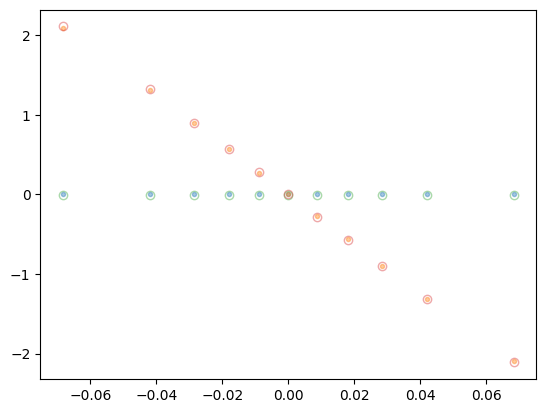

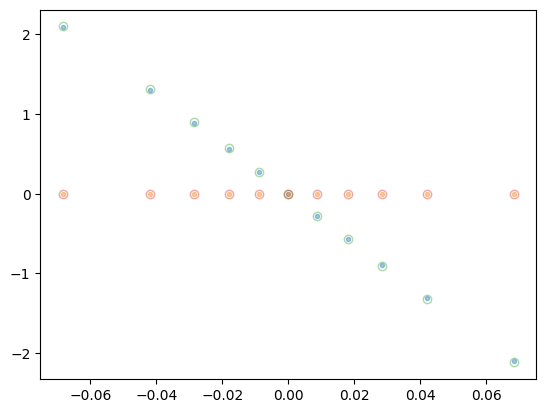

In [24]:
for IP in [IP1,IP5]:

    shift_x = np.array([tracker.element_refs[_bb].other_beam_shift_x._value for _bb in IP.bb.index])
    shift_y = np.array([tracker.element_refs[_bb].other_beam_shift_y._value for _bb in IP.bb.index])


    ref_shift_x = np.array([tracker.element_refs[_bb].ref_shift_x._value for _bb in IP.bb.index])
    ref_shift_y = np.array([tracker.element_refs[_bb].ref_shift_y._value for _bb in IP.bb.index])

    slices_other_beam_x_center = np.array([tracker.element_refs[_bb].slices_other_beam_x_center._value[0] for _bb in IP.bb.index])
    slices_other_beam_y_center = np.array([tracker.element_refs[_bb].slices_other_beam_y_center._value[0] for _bb in IP.bb.index])

    sig_x = np.array([tracker.element_refs[_bb].other_beam_Sigma_11._value for _bb in IP.bb.index])
    sig_y = np.array([tracker.element_refs[_bb].other_beam_Sigma_33._value for _bb in IP.bb.index])

    sig_x_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_11._value[0] for _bb in IP.ho.index])
    sig_y_HO = np.array([tracker.element_refs[_bb].slices_other_beam_Sigma_33._value[0] for _bb in IP.ho.index])

    sig_x[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_x_HO
    sig_y[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)] = sig_y_HO

    sig_x = np.sqrt(sig_x.astype(float))
    sig_y = np.sqrt(sig_y.astype(float))
    
    dx = shift_x+ref_shift_x+slices_other_beam_x_center-twiss['b1'].loc[IP.bb.index].x.values
    dy = shift_y+ref_shift_y+slices_other_beam_y_center-twiss['b1'].loc[IP.bb.index].y.values

    dx = shift_x
    dy = shift_y

    dx_n = dx/sig_x
    dy_n = dy/sig_y

    dx_n = dx_n[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)]
    dy_n = dy_n[len(IP.lr)//2:len(IP.lr)//2+len(IP.ho)]

    s_vec   = twiss['b1'].loc[IP.ho.index].s.values - twiss['b1'].loc[IP.name].s
    
    plt.figure()
    plt.plot(s_vec,dx_n,'.',ls='',alpha=0.4)
    plt.plot(s_vec,dy_n,'.',ls='',alpha=0.4)
    plt.plot(s_vec,IP.ho.dx_n,'o',mfc='none',alpha=0.4)
    plt.plot(s_vec,IP.ho.dy_n,'o',mfc='none',alpha=0.4)

Execution time, HO: 33.051 s


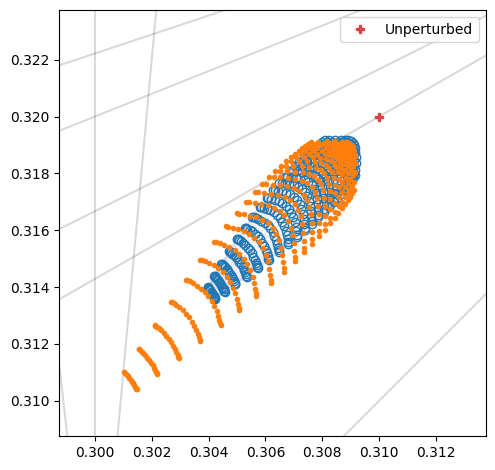

In [9]:

window    = 0.015
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting



# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
for idx,tracked in enumerate([tracked_HO]):
    dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
    dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
#---------------

bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',color='C0',mfc='none')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

#=============================
# Analytic
DQx_HO,DQy_HO = np.zeros(len(coordinates))+Qx_0,np.zeros(len(coordinates))+Qy_0

s_time = time.time()
for IP in [IP1,IP5]:
    #for index, _bb in IP.ho.iterrows():
        

    
        # _DQx,_DQy = dtune.HeadOn_round( ax    = coordinates['x_sig'],
        #                                 ay    = coordinates['y_sig'],
        #                                 r     = _bb['r'],
        #                                 emitt = IP.b2.emittx,
        #                                 xi    = IP.b2.xi/len(IP1.ho))
    _bb = IP.ho.loc[IP.ho.index[len(IP.ho)//2]]
    _DQx,_DQy = dtune.DQx_DQy(  ax     = coordinates['x_sig'],
                                ay     = coordinates['y_sig'],
                                r      = _bb['r'],
                                dx_n   = _bb['dx_n'],
                                dy_n   = _bb['dy_n'],
                                A_w_s  = _bb['A_w_s'],
                                B_w_s  = _bb['B_w_s'],
                                xi     = IP.b2.xi)

    DQx_HO += _DQx
    DQy_HO += _DQy

e_time = time.time()
print(f'Execution time, HO: {(e_time-s_time):.3f} s')
#=============================

plt.plot(DQx_HO,DQy_HO,'.',color='C1')
plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()




In [24]:
twiss['b1'].loc[_IP.ho.index[1],'x']

-6.721564949220508e-06

In [22]:
tracker.element_refs[_IP.ho.index[1]].inspect()

╭──────────────────────── <class 'xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D'> ────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D object at 0x7f8b26bb0a90>                            │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                               alpha = -4.9026013253473786e-05                                                   │
│                           cos_alpha = 0.999999998798225                                                         │
│                             cos_phi = 0.9999999871992113                                                        │
│                       extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources`       │
│                                       instead.')                                                                │
│                        iscollective = None                                                                      │
│                      min_sigma_diff = 1e-10                                                                     │
│               num_slices_other_beam = 1                                                                         │
│                       other_beam_q0 = 1.0                                                                       │
│                 other_beam_shift_px = 0.0                                                                       │
│                 other_beam_shift_py = 0.0                                                                       │
│              other_beam_shift_pzeta = 0.0                                                                       │
│                  other_beam_shift_x = 1.3436793778964784e-05                                                    │
│                  other_beam_shift_y = 2.3367547197751696e-11                                                    │
│               other_beam_shift_zeta = 0.0                                                                       │
│                                 phi = 0.00016000492911855504                                                    │
│                    post_subtract_px = -1.8122302940785278e-07                                                   │
│                    post_subtract_py = -3.1515983384444e-13                                                      │
│                 post_subtract_pzeta = -2.940026000430862e-11                                                    │
│                     post_subtract_x = -3.896216032098221e-16                                                    │
│                     post_subtract_y = -6.774609216809297e-22                                                    │
│                  post_subtract_zeta = 0.0                                                                       │
│                        ref_shift_px = 0.00016001938586576855                                                    │
│                        ref_shift_py = -3.237792154796969e-08                                                    │
│                     ref_shift_pzeta = 4.523862442429305e-07                                                     │
│                         ref_shift_x = -6.721560713013151e-06                                                    │
│                         ref_shift_y = 4.93041914653087e-09                                                      │
│                      ref_shift_zeta = 6.389152145944127e-07                                                     │
│                           sin_alpha = -4.902601323383437e-05                                                    │
│                             sin_phi = 0.00016000492843

In [ ]:
np.array([tracker.element_refs[_bb].other_bea._value for _bb in _IP.bb.index])

In [15]:
s_vec

array([-0.06838771, -0.04198855, -0.02852748, -0.01801493, -0.00875562,
        0.        ,  0.00875562,  0.01801493,  0.02852748,  0.04198855,
        0.06838771])

In [16]:
IP5.b2.ho

,s,x_lab,y_lab,s_lab,x,px,y,py,zeta,delta,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
bb_ho.l5b2_05,6664.804780,1.094085e-05,4.164494e-09,-0.068388,1.094085e-05,-0.00016,4.164494e-09,2.716781e-08,-0.000004,4.384543e-07,...,-0.033525,0.006974,0.044547,15.161324,14.281665,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.l5b2_04,6664.831179,6.716491e-06,4.881701e-09,-0.041989,6.716491e-06,-0.00016,4.881701e-09,2.716781e-08,-0.000004,4.384543e-07,...,-0.033532,0.008151,0.044657,15.174917,14.294643,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.l5b2_03,6664.844640,4.562467e-06,5.247409e-09,-0.028527,4.562467e-06,-0.00016,5.247409e-09,2.716781e-08,-0.000004,4.384543e-07,...,-0.033558,0.008752,0.044803,15.182026,14.301444,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.l5b2_02,6664.855152,2.880259e-06,5.533012e-09,-0.018015,2.880259e-06,-0.00016,5.533012e-09,2.716782e-08,-0.000004,4.384543e-07,...,-0.033603,0.009223,0.044977,15.187639,14.306821,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.l5b2_01,6664.864412,1.398596e-06,5.784567e-09,-0.008756,1.398596e-06,-0.00016,5.784567e-09,2.716782e-08,-0.000004,4.384543e-07,...,-0.033664,0.009639,0.045171,15.192615,14.311592,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.c5b2_00,6664.873167,-2.468957e-09,6.022438e-09,0.000000,-2.468957e-09,-0.00016,6.022438e-09,2.716782e-08,-0.000004,4.384543e-07,...,-0.033735,0.010035,0.045376,15.197335,14.316125,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.r5b2_01,6664.881923,-1.403534e-06,6.260309e-09,0.008756,-1.403534e-06,-0.00016,6.260309e-09,2.716782e-08,-0.000004,4.384543e-07,...,-0.033807,0.010432,0.045585,15.202062,14.320669,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.r5b2_02,6664.891182,-2.885197e-06,6.511864e-09,0.018015,-2.885197e-06,-0.00016,6.511864e-09,2.716783e-08,-0.000004,4.384543e-07,...,-0.033872,0.010854,0.045790,15.207056,14.325477,62.300698,60.312389,0.001867,12.739489,9.692277
bb_ho.r5b2_03,6664.901695,-4.567405e-06,6.797467e-09,0.028527,-4.567405e-06,-0.00016,6.797467e-09,2.716783e-08,-0.000004,4.384543e-07,...,-0.033918,0.011335,0.045979,15.212706,14.330927,62.300698,60.312389,0.001867,12.739489,9.692277


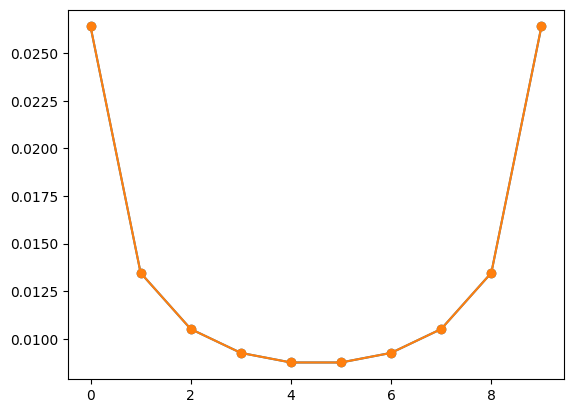

In [14]:
plt.figure()
for _IP in [IP1,IP5]:

    s_vec   = twiss['b1'].loc[_IP.ho.index].s.values - twiss['b1'].loc[_IP.name].s
    I_vec   = np.array([tracker.element_refs[_bb].slices_other_beam_num_particles._value[0] for _bb in _IP.ho.index])
    

    #plt.plot(s_vec,I_vec,'-o')
    plt.plot(np.diff(s_vec),'-o')

    

# Plotting full octupolar footprint

In [95]:
#=========================================================
coordinates = phys.polar_grid(  r_sig     = np.logspace(np.log10(0.5),np.log10(7),10),
                                theta_sig = np.linspace(0.01*np.pi/2,0.99*np.pi/2,7),
                                emitt   = [B1.emittx,B1.emitty])


Execution time, HO: 0.029 s
Execution time, LR: 0.041 s
Execution time, HO: 0.029 s
Execution time, LR: 0.040 s


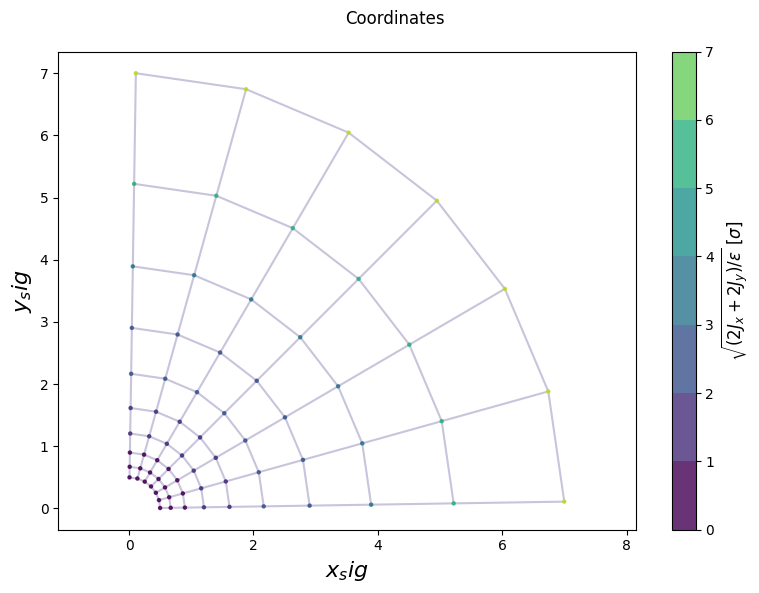

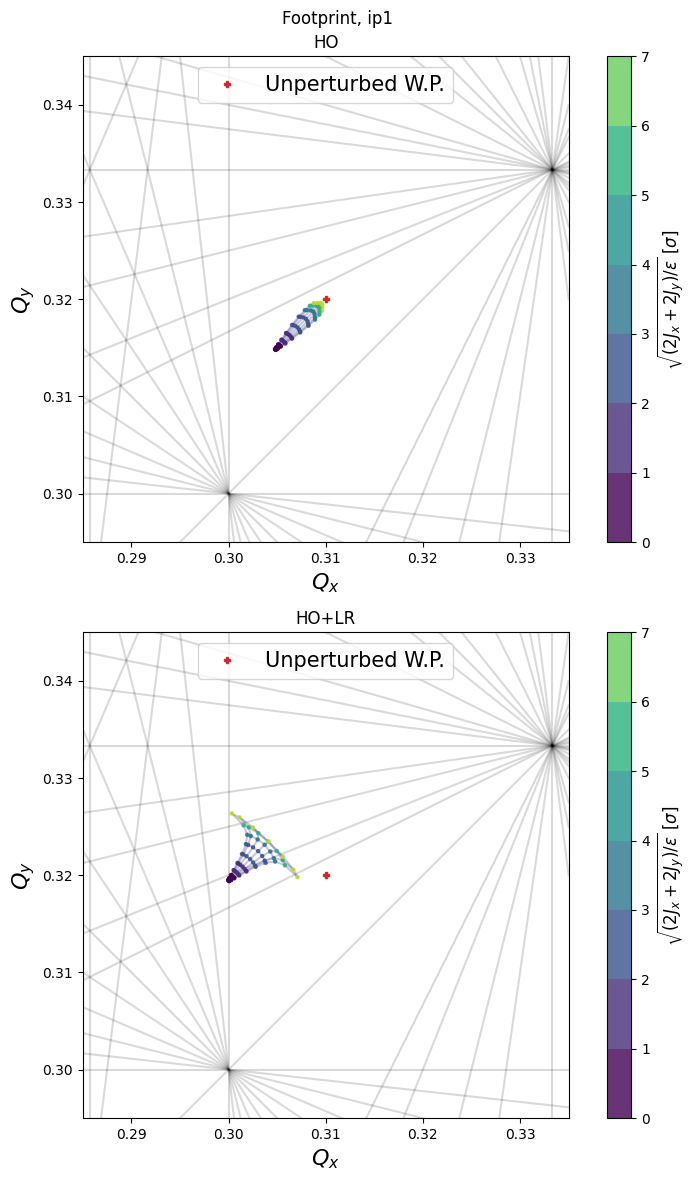

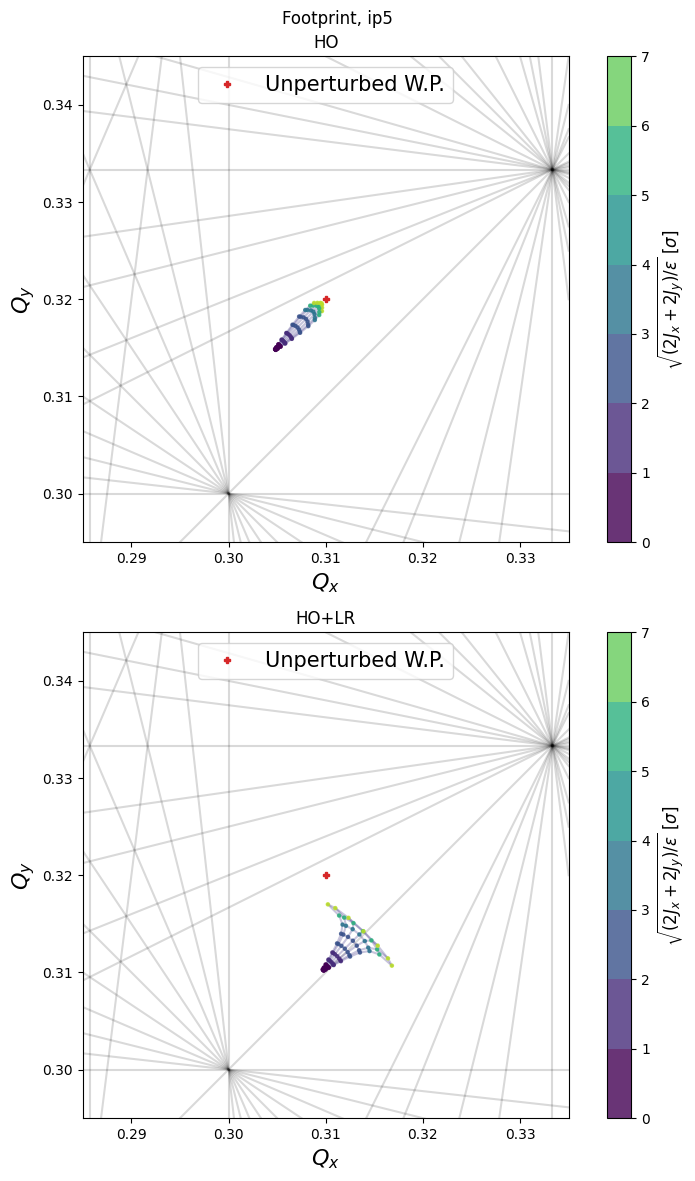

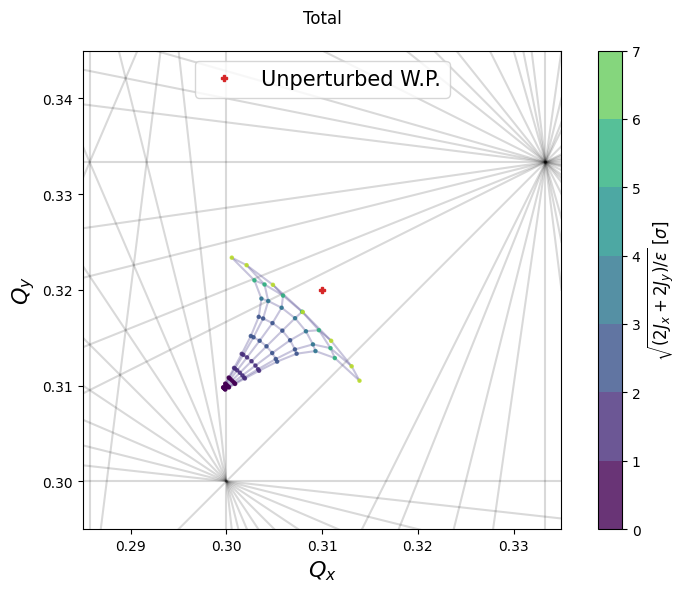

In [6]:
import time

# Generating Coord grid
#=========================================================
coordinates = phys.polar_grid(  r_sig     = np.logspace(np.log10(0.5),np.log10(7),10),
                                theta_sig = np.linspace(0.01*np.pi/2,0.99*np.pi/2,7),
                                emitt   = [B1.emittx,B1.emitty])


# Plotting coordinates
#-----------------------
plt.figure(figsize=(8,6))
cmap = 'viridis'
cmax = int(np.max(coordinates['r_sig'])+1)
boundaries = np.linspace(0,cmax,cmax+1)

plt.suptitle('Coordinates')

bbplt.polarmesh(coordinates['x_sig'],coordinates['y_sig'],r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
bbplt.boundedScatter(coordinates['x_sig'],coordinates['y_sig'],c=coordinates['r_sig'],s=5,alpha=0.8,boundaries=boundaries,cmap='viridis')

plt.xlabel(r'$x_sig$',fontsize=16);
plt.ylabel(r'$y_sig$',fontsize=16);
plt.axis('equal');
cbar = plt.colorbar()
plt.set_cmap(cmap)
cbar.ax.set_ylim([0,np.max(coordinates['r_sig'])])
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=12)
plt.tight_layout()
#=========================================================


window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

DQx_total,DQy_total = np.zeros(len(coordinates)),np.zeros(len(coordinates))
for IP in [IP1,IP5]:
    DQx_IP,DQy_IP = np.zeros(len(coordinates)),np.zeros(len(coordinates))
    
    # Generic HO
    _bb = IP.ho.loc[IP.ho.index[len(IP.ho)//2]]

    s_time = time.time()
    _DQx,_DQy = dtune.HeadOn_round(   ax    = coordinates['x_sig'],
                                    ay    = coordinates['y_sig'],
                                    r     = _bb['r'],
                                    emitt = IP.b2.emittx,
                                    xi    = IP.b2.xi/np.sqrt(2))

    DQx_total += _DQx
    DQy_total += _DQy
    DQx_IP    += _DQx
    DQy_IP    += _DQy
    e_time = time.time()
    print(f'Execution time, HO: {(e_time-s_time):.3f} s')

    
    fig,axes = plt.subplots(2,1,figsize=(8,12))
    fig.suptitle(f'Footprint, {IP.name}')

    # Plotting HO only
    #-----------------------
    plt.sca(axes[0])
    plt.gca().set_title('HO')

    def plot_IP_tune():
        bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=10,color='k',alpha=0.15)
        bbplt.polarmesh(Qx_0 + DQx_IP,Qy_0 + DQy_IP,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
        bbplt.boundedScatter(Qx_0 + DQx_IP,Qy_0 + DQy_IP,c=coordinates['r_sig'],s=5,alpha=0.8,boundaries=boundaries,cmap='viridis')
        plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')

        plt.legend(fontsize=15)
        plt.xlabel(r'$Q_x$',fontsize=16);
        plt.ylabel(r'$Q_y$',fontsize=16);
        plt.axis('square');
        cbar = plt.colorbar()
        plt.set_cmap(cmap)
        cbar.ax.set_ylim([0,np.max(coordinates['r_sig'])])
        cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=12)
        plt.xlim(Qx_lim)
        plt.ylim(Qy_lim)
    plot_IP_tune()


    # Generic LR
    s_time = time.time()
    for index, _bb in IP.lr.iterrows():
        _DQx,_DQy = dtune.BBLR_octupole(    coordinates['J_x'],
                                            coordinates['J_y'],
                                            betx = _bb['betx'],
                                            bety = _bb['bety'],
                                            k1   = _bb['k1'],
                                            k3   = _bb['k3'])
        DQx_total += _DQx
        DQy_total += _DQy
        DQx_IP    += _DQx
        DQy_IP    += _DQy
    e_time = time.time()
    print(f'Execution time, LR: {(e_time-s_time):.3f} s')

    plt.sca(axes[1])
    plt.gca().set_title('HO+LR')
    plot_IP_tune()

    plt.tight_layout()



plt.figure(figsize=(8,6))
plt.suptitle(f'Total')

bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=10,color='k',alpha=0.15)
bbplt.polarmesh(Qx_0 + DQx_total,Qy_0 + DQy_total,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
bbplt.boundedScatter(Qx_0 + DQx_total,Qy_0 + DQy_total,c=coordinates['r_sig'],s=5,alpha=0.8,boundaries=boundaries,cmap='viridis')
plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')

plt.legend(fontsize=15)
plt.xlabel(r'$Q_x$',fontsize=16);
plt.ylabel(r'$Q_y$',fontsize=16);
plt.axis('square');
cbar = plt.colorbar()
plt.set_cmap(cmap)
cbar.ax.set_ylim([0,np.max(coordinates['r_sig'])])
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=12)
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()





Execution time, HO: 0.070 s
Execution time, LR: 0.079 s
Execution time, HO: 0.073 s
Execution time, LR: 0.080 s


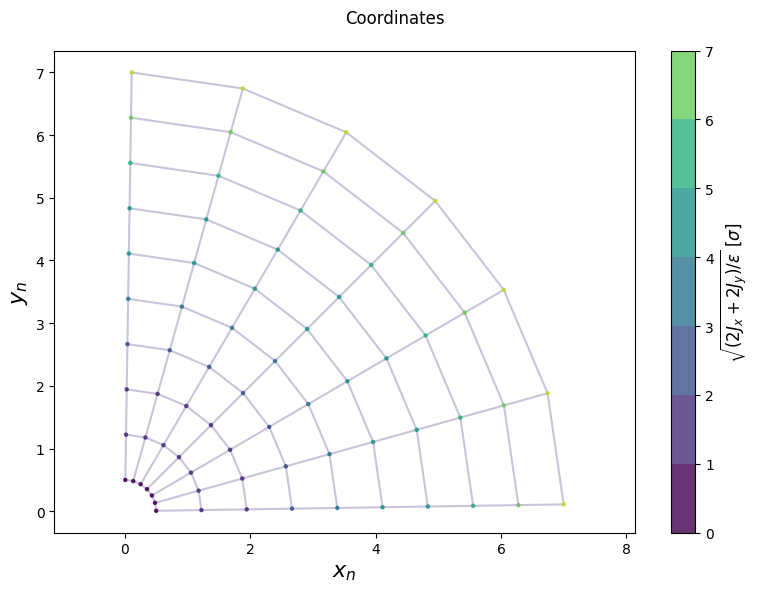

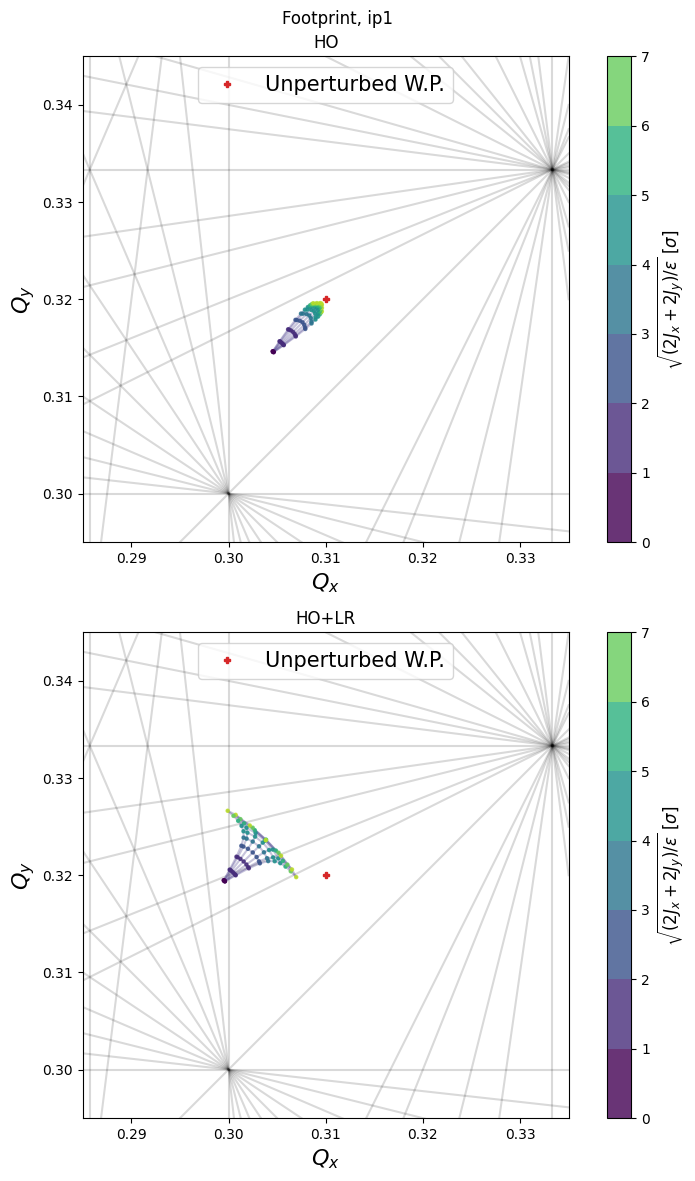

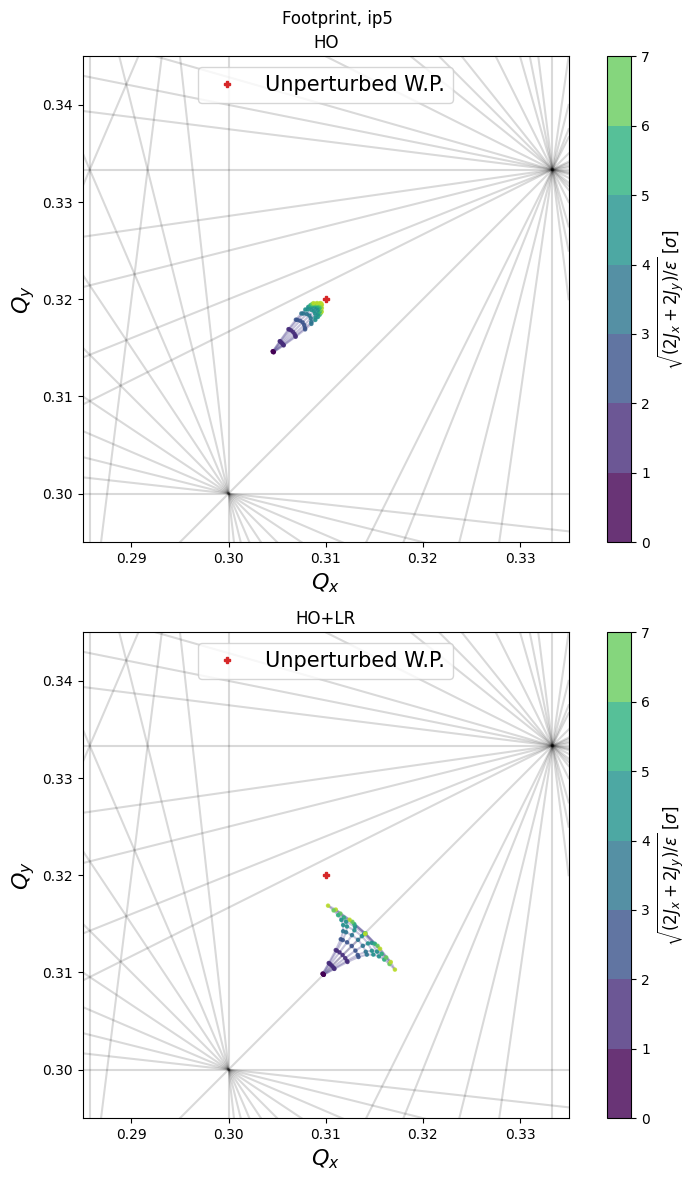

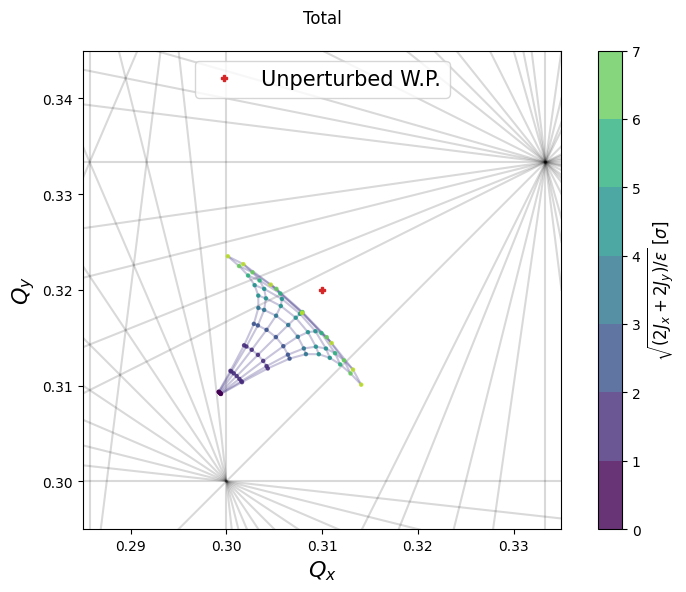

In [7]:
import time

# Generating Coord grid
#=========================================================
# coordinates = phys.polar_grid(  r_sig     = np.linspace(0,4,5),#np.logspace(np.log10(0.5),np.log10(7),10),
#                                 theta_sig = np.linspace(0.01*np.pi/2,0.99*np.pi/2,7),
#                                 emitt   = [B1.emittx,B1.emitty])

coordinates = phys.polar_grid(  r_sig     = np.linspace(1,6.5,23),
                                theta_sig = np.linspace(0.05*np.pi/2,0.95*np.pi/2,15),
                                emitt     = [B1.emittx,B1.emitty])
coordinates.insert(0,'delta',0)


# Plotting coordinates
#-----------------------
plt.figure(figsize=(8,6))
cmap = 'viridis'
cmax = int(np.max(coordinates['r_sig'])+1)
boundaries = np.linspace(0,cmax,cmax+1)

plt.suptitle('Coordinates')

bbplt.polarmesh(coordinates['x_sig'],coordinates['y_sig'],r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
bbplt.boundedScatter(coordinates['x_sig'],coordinates['y_sig'],c=coordinates['r_sig'],s=5,alpha=0.8,boundaries=boundaries,cmap='viridis')

plt.xlabel(r'$x_sig$',fontsize=16);
plt.ylabel(r'$y_sig$',fontsize=16);
plt.axis('square');
cbar = plt.colorbar()
plt.set_cmap(cmap)
cbar.ax.set_ylim([0,np.max(coordinates['r_sig'])])
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=12)
plt.tight_layout()
#=========================================================


window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

DQx_total,DQy_total = np.zeros(len(coordinates)),np.zeros(len(coordinates))
for IP in [IP1,IP5]:
    DQx_IP,DQy_IP = np.zeros(len(coordinates)),np.zeros(len(coordinates))
    
    # Generic HO
    _bb = IP.ho.loc[IP.ho.index[len(IP.ho)//2]]

    s_time = time.time()
    _DQx,_DQy = dtune.DQx_DQy( ax  = coordinates['x_sig'],
                            ay   = coordinates['y_sig'],
                            r    = _bb['r'],
                            dx_sig = _bb['dx_sig'],
                            dy_sig = _bb['dy_sig'],
                            A_w_s= _bb['A_w_s'],
                            B_w_s= _bb['B_w_s'],
                            xi   = IP5.b2.xi/np.sqrt(2))

    

    DQx_total += _DQx
    DQy_total += _DQy
    DQx_IP    += _DQx
    DQy_IP    += _DQy
    e_time = time.time()
    print(f'Execution time, HO: {(e_time-s_time):.3f} s')

    
    fig,axes = plt.subplots(2,1,figsize=(8,12))
    fig.suptitle(f'Footprint, {IP.name}')

    # Plotting HO only
    #-----------------------
    plt.sca(axes[0])
    plt.gca().set_title('HO')

    def plot_IP_tune():
        bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=12,color='k',alpha=0.15)
        bbplt.polarmesh(Qx_0 + DQx_IP,Qy_0 + DQy_IP,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
        bbplt.boundedScatter(Qx_0 + DQx_IP,Qy_0 + DQy_IP,c=coordinates['r_sig'],s=5,alpha=0.8,boundaries=boundaries,cmap='viridis')
        plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')

        plt.legend(fontsize=15)
        plt.xlabel(r'$Q_x$',fontsize=16);
        plt.ylabel(r'$Q_y$',fontsize=16);
        plt.axis('square');
        cbar = plt.colorbar()
        plt.set_cmap(cmap)
        cbar.ax.set_ylim([0,np.max(coordinates['r_sig'])])
        cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=12)
        plt.xlim(Qx_lim)
        plt.ylim(Qy_lim)
    plot_IP_tune()


    # Generic LR
    s_time = time.time()
    for index, _bb in IP.lr.iterrows():

        lr_sigum = int(_bb.name.split('b1_')[1])
        # if 12 < lr_sigum < 16:
        #     pass
        # else:
        #     continue 
        # 
        print('LR: ',lr_sigum)
        s_sub_time = time.time()
        _DQx,_DQy = dtune.DQx_DQy(  ax   = coordinates['x_sig'],
                                    ay   = coordinates['y_sig'],
                                    r    = _bb['r'],
                                    dx_sig = _bb['dx_sig'],
                                    dy_sig = _bb['dy_sig'],
                                    A_w_s= _bb['A_w_s']/2,
                                    B_w_s= _bb['B_w_s']/2,
                                    xi   = IP.b2.xi) 
        e_sub_time = time.time()
        print(f'Execution time, LR: {(e_sub_time-s_sub_time):.3f} s')
        print(40*'-')
        # _DQx,_DQy = dtune.BBLR_octupole(    coordinates['J_x'],
        #                                     coordinates['J_y'],
        #                                     betx = _bb['betx'],
        #                                     bety = _bb['bety'],
        #                                     k1   = _bb['k1'],
        #                                     k3   = _bb['k3'])
        DQx_total += _DQx
        DQy_total += _DQy
        DQx_IP    += _DQx
        DQy_IP    += _DQy
    e_time = time.time()
    print(f'Execution time, LR: {(e_time-s_time):.3f} s')

    plt.sca(axes[1])
    plt.gca().set_title('HO+LR')
    plot_IP_tune()

    plt.tight_layout()



plt.figure(figsize=(8,6))
plt.suptitle(f'Total')

bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=12,color='k',alpha=0.15)
bbplt.polarmesh(Qx_0 + DQx_total,Qy_0 + DQy_total,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
bbplt.boundedScatter(Qx_0 + DQx_total,Qy_0 + DQy_total,c=coordinates['r_sig'],s=5,alpha=0.8,boundaries=boundaries,cmap='viridis')
plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')

plt.legend(fontsize=15)
plt.xlabel(r'$Q_x$',fontsize=16);
plt.ylabel(r'$Q_y$',fontsize=16);
plt.axis('square');
cbar = plt.colorbar()
plt.set_cmap(cmap)
cbar.ax.set_ylim([0,np.max(coordinates['r_sig'])])
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=12)
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()

#plt.savefig('Analytic_footprint.png',format='png',dpi=300)

